In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pickle
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#changing the column names
new={'Genre':'Gender','Annual Income (k$)':'Annual Income',
     'Spending Score (1-100)':'Spending Score'}
df.rename(columns=new,inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#conerting annual income from k$ to Rs.
df['Annual Income']=df['Annual Income']*1000*88
df.head()
print(df['Annual Income'].min(), df['Annual Income'].max())

1320000 12056000


In [6]:
df[df['Age']<0]

,CustomerID,Gender,Age,Annual Income,Spending Score


In [7]:
copied_dataset=df.copy()

In [8]:
copied_dataset.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,1320000,39
1,2,Male,21,1320000,81
2,3,Female,20,1408000,6
3,4,Female,23,1408000,77
4,5,Female,31,1496000,40


In [9]:
#converting gender column into numeric values
obj=LabelEncoder()
df['Gender']=obj.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,1320000,39
1,2,1,21,1320000,81
2,3,0,20,1408000,6
3,4,0,23,1408000,77
4,5,0,31,1496000,40


In [10]:
df=df.drop('CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,1320000,39
1,1,21,1320000,81
2,0,20,1408000,6
3,0,23,1408000,77
4,0,31,1496000,40


Text(0.5, 1.0, 'Annual Income v/s Spending score')

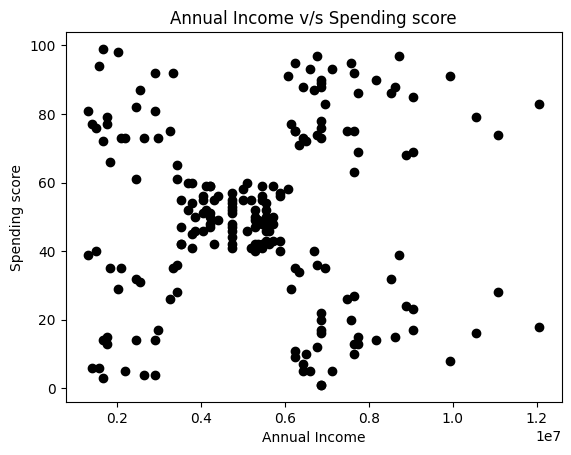

In [11]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],c='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Annual Income v/s Spending score')
# understanding how clusters are formed

In [12]:
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
new_data=obj.fit_transform(df)
df=pd.DataFrame(new_data,columns=df.columns)


In [13]:
#getting inertia values to identify the value for k
out=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(df)
    out.append(model.inertia_)
print(out)

[800.0000000000001, 597.947293793228, 494.8037500130457, 395.39209034797966, 351.7432061711912, 277.389740198519, 251.15484911190177, 211.98576294959312, 185.7280768871142, 152.02983429775685]


Text(0.5, 1.0, 'Elbow curve')

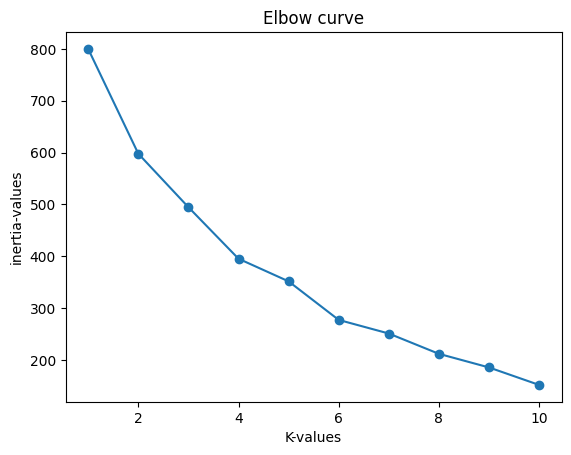

In [14]:
#plotting elbow curve
plt.plot(range(1,11),out,marker='o')
plt.xlabel('K-values')
plt.ylabel('inertia-values')
plt.title('Elbow curve')

In [15]:
 #train the clustering model with k=5
model=KMeans(n_clusters=4,random_state=42)
model.fit(df)
KMeans(n_clusters=4, random_state=42)
 #getting labels from the trained model
klabels=model.labels_
 #getting centroids of each cluster
centers=model.cluster_centers_
klabels

array([2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 3, 2, 0, 3, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2,
       3, 0, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 2, 0, 3, 0, 2, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 2, 3, 3, 0, 0, 0, 0, 2, 3, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2,
       3, 3, 1, 3, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 2], dtype=int32)

Text(0.5, 1.0, 'Annual Income v/s Spending score')

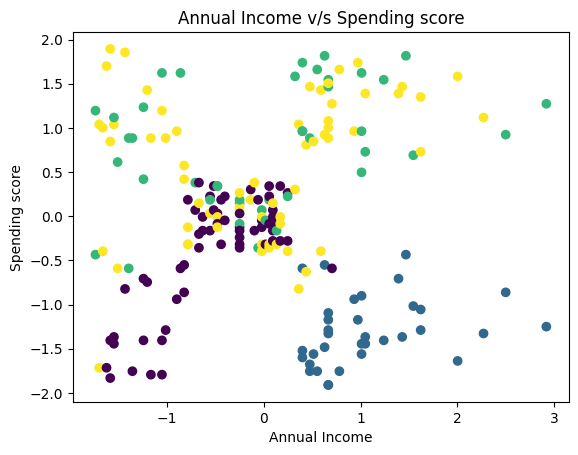

In [16]:
 #plotting clusters from the trained model
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=klabels)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Annual Income v/s Spending score')

In [17]:
#trying with heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
acmodel=AgglomerativeClustering(n_clusters=4)
acmodel.fit(df)
aclabels=acmodel.labels_
aclabels

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Text(0.5, 1.0, 'Annual Income v/s Spending score')

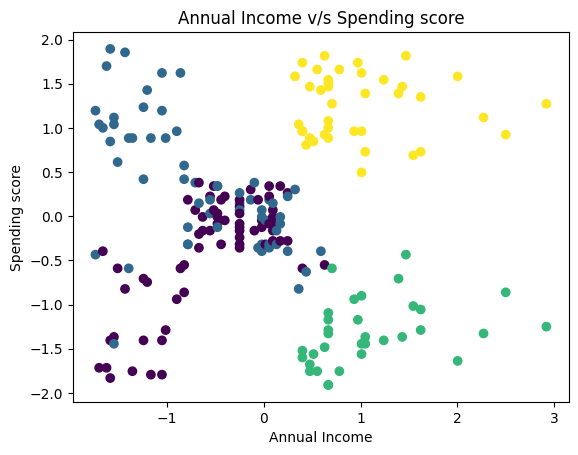

In [18]:
#plotting clusters from the acmodel
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=aclabels)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Annual Income v/s Spending score')

In [19]:
 #working with dbscan
from sklearn.cluster import DBSCAN
dbmodel=DBSCAN(eps=0.5,min_samples=4)
dbmodel.fit(df)
dblabels=dbmodel.labels_
dblabels

array([-1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  1,  2,
        1, -1, -1, -1,  1, -1,  1, -1,  1,  2, -1,  2,  0, -1,  0, -1, -1,
       -1,  0, -1, -1,  2,  0, -1, -1,  5,  4, -1,  0,  3,  4,  4,  4,  3,
       -1,  4,  5,  3,  5,  3,  5,  4,  5,  5, -1, -1,  3,  5, -1,  3, -1,
       -1,  4,  5,  3,  3,  3,  5,  6,  3, -1,  4,  3,  5, -1,  5,  3,  4,
        5,  3,  4, -1,  3, -1,  6,  5,  4,  4,  6,  3,  4,  5,  6,  4,  3,
        5,  6,  5,  4, -1,  5,  5,  5,  5,  4,  4,  6,  4,  4, -1,  3,  3,
        3,  6,  4, -1,  7,  4,  8, -1,  7, -1, -1, -1, -1,  4,  8,  9,  8,
       -1, -1,  9,  8, -1,  7,  4,  8,  9, -1, -1,  8, -1,  7, 10,  7, -1,
        8, -1,  8, -1,  8, -1,  8, -1,  8,  9,  8, -1,  8, 10,  8, 11, -1,
       10, -1, 10,  7, -1,  8, -1, -1, -1,  7, 11,  8, -1,  8, 11, -1, -1,
       -1, -1,  8, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Text(0.5, 1.0, 'Annual Income v/s Spending score')

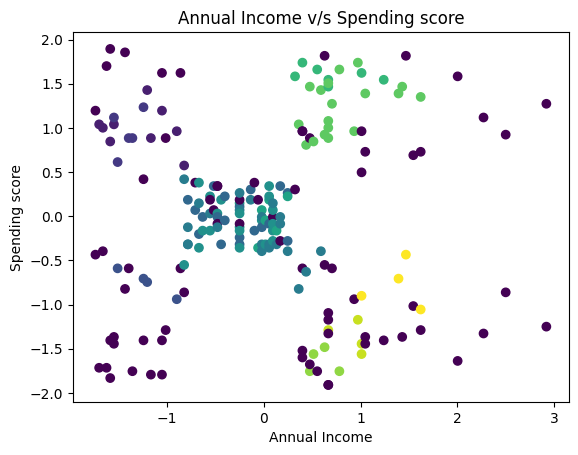

In [20]:
#plotting clusters from the dbmodel
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=dblabels)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Annual Income v/s Spending score')

In [21]:
aclabels

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [22]:
copied_dataset.head()
copied_dataset=copied_dataset.drop('CustomerID',axis=1)
copied_dataset['labels']=aclabels
copied_dataset.head()

,Gender,Age,Annual Income,Spending Score,labels
0,Male,19,1320000,39,1
1,Male,21,1320000,81,1
2,Female,20,1408000,6,0
3,Female,23,1408000,77,1
4,Female,31,1496000,40,0


In [23]:
groups=copied_dataset.groupby('labels')
groups.groups

{0: [2, 4, 6, 8, 10, 12, 16, 18, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 50, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 67, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83, 85, 86, 89, 90, 92, 96, 98, 101, 102, 104, 106, 107, 108, 109, 110, 116, 117, 118, 119, 126, 146], 1: [0, 1, 3, 5, 7, 9, 11, 13, 14, 15, 17, 19, 20, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 48, 49, 51, 52, 58, 61, 65, 68, 69, 75, 78, 84, 87, 88, 91, 93, 94, 95, 97, 99, 100, 103, 105, 111, 112, 113, 114, 115, 120, 121, 122, 124, 132, 142], 2: [128, 130, 134, 136, 138, 140, 144, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198], 3: [123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]}

In [24]:
d={0:'Average income with low spending',
1:'Low income with average spending',
2:'High income with low spending',
3:'High income with high spending'}

In [25]:
copied_dataset['labels']=copied_dataset['labels'].map(d)
copied_dataset.head()

,Gender,Age,Annual Income,Spending Score,labels
0,Male,19,1320000,39,Low income with average spending
1,Male,21,1320000,81,Low income with average spending
2,Female,20,1408000,6,Average income with low spending
3,Female,23,1408000,77,Low income with average spending
4,Female,31,1496000,40,Average income with low spending


In [26]:
copied_dataset.to_csv('dataset.csv')

In [27]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [28]:
with open('acmodel.pkl','wb') as file:
    pickle.dump(acmodel,file)
df.to_csv('original_df.csv')
    

In [29]:
with open('scalar_obj.pkl','wb') as file:
    pickle.dump(obj,file)